import libary

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan 
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di 
atas.

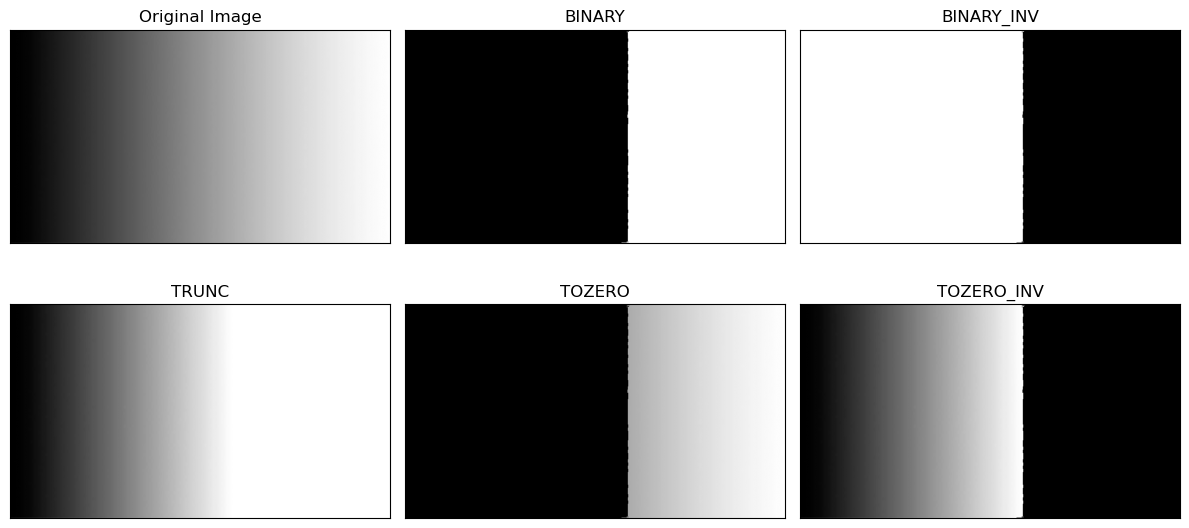

In [2]:
img_path = r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\gradient.jpg"

# Membaca gambar dalam grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Menentukan nilai threshold
thresh_value = 170
max_value = 255


# ====== Global Thresholding ======
# 1. BINARY
_, th_binary = cv2.threshold(img, thresh_value, max_value, cv2.THRESH_BINARY)

# 2. BINARY_INV
_, th_binary_inv = cv2.threshold(img, thresh_value, max_value, cv2.THRESH_BINARY_INV)

# 3. TRUNC
_, th_trunc = cv2.threshold(img, thresh_value, max_value, cv2.THRESH_TRUNC)

# 4. TOZERO
_, th_tozero = cv2.threshold(img, thresh_value, max_value, cv2.THRESH_TOZERO)

# 5. TOZERO_INV
_, th_tozero_inv = cv2.threshold(img, thresh_value, max_value, cv2.THRESH_TOZERO_INV)

# ====== Menampilkan hasil ======
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, th_binary, th_binary_inv, th_trunc, th_tozero, th_tozero_inv]

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold 
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image 
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

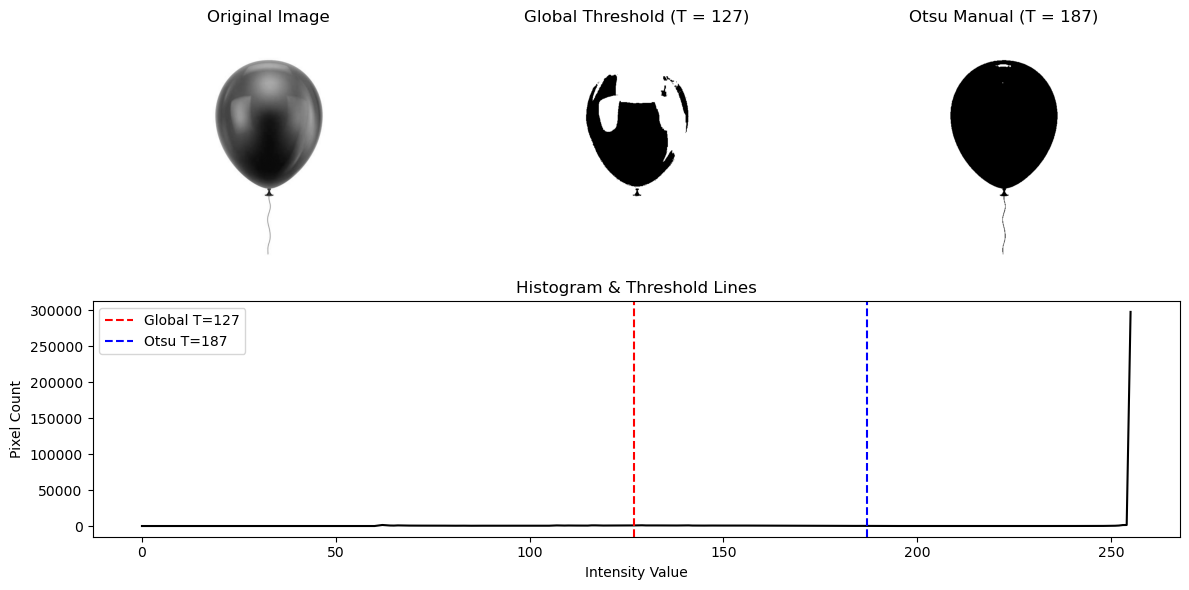

Nilai Threshold Otsu (Manual) = 187


In [3]:
img_path = r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\ballon.png"

# Membaca gambar dalam grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# ====== 1. Global Threshold biasa ======
th_global = 127
_, img_global = cv2.threshold(img, th_global, 255, cv2.THRESH_BINARY)

# ====== 2. Hitung histogram dan probabilitas ======
hist, bins = np.histogram(img.flatten(), bins=256, range=[0,256])
total_pixels = img.size
prob = hist / total_pixels

# ====== 3. Perhitungan Otsu secara manual ======
current_max, threshold_otsu = 0, 0
sum_total = np.dot(np.arange(256), prob)
sumB, wB = 0.0, 0.0

for t in range(256):
    wB += prob[t]             # bobot kelas background
    if wB == 0:
        continue
    wF = 1 - wB               # bobot kelas foreground
    if wF == 0:
        break
    sumB += t * prob[t]
    mB = sumB / wB            # mean background
    mF = (sum_total - sumB) / wF  # mean foreground
    var_between = wB * wF * (mB - mF) ** 2  # variansi antar kelas
    if var_between > current_max:
        current_max = var_between
        threshold_otsu = t

# ====== 4. Terapkan threshold hasil Otsu ======
img_otsu_manual = np.where(img > threshold_otsu, 255, 0).astype(np.uint8)

# ====== 5. Visualisasi hasil ======
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_global, cmap='gray')
plt.title(f'Global Threshold (T = {th_global})')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_otsu_manual, cmap='gray')
plt.title(f'Otsu Manual (T = {threshold_otsu})')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.plot(hist, color='black')
plt.axvline(th_global, color='r', linestyle='--', label=f'Global T={th_global}')
plt.axvline(threshold_otsu, color='b', linestyle='--', label=f'Otsu T={threshold_otsu}')
plt.title('Histogram & Threshold Lines')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Nilai Threshold Otsu (Manual) = {threshold_otsu}")

Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image 
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images. 
Petunjuk:  

a. anda dapat gunakan cv.calcHist untuk menampilkan histogram. 

b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html   

c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter 
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung 
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang 
dimasking warna putih yang akan dihitung histogramnya (dari contoh 
dibawah dinamakan dengan Citra Segment).

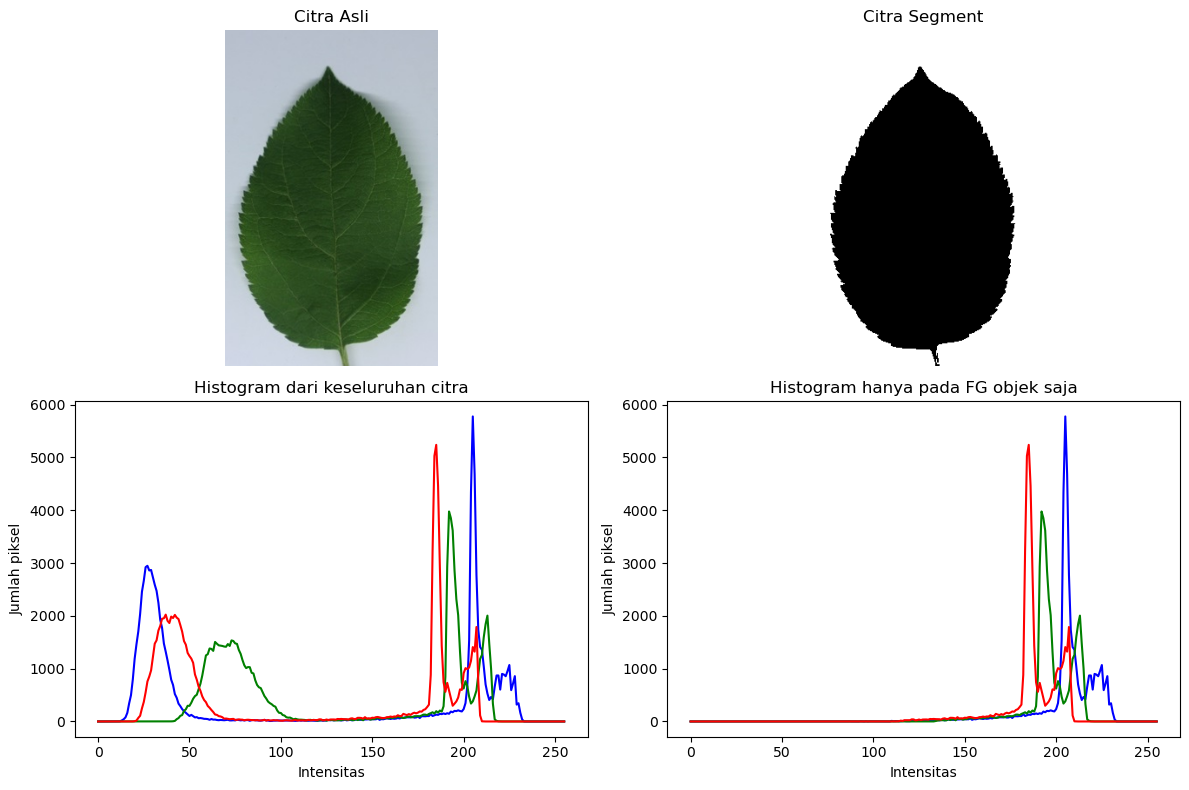

In [4]:
img_path = r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\manalagi.jpg"

# Membaca citra berwarna
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ====== 1. Segmentasi (buat mask dengan threshold sederhana) ======
# Ubah ke grayscale untuk thresholding
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gunakan Otsu untuk mendapatkan mask
_, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# ====== 2. Histogram dari keseluruhan citra ======
colors = ('b', 'g', 'r')
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("Citra Asli")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Citra Segment")
plt.axis('off')

plt.subplot(2, 2, 3)
for i, col in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.title("Histogram dari keseluruhan citra")
plt.xlabel("Intensitas")
plt.ylabel("Jumlah piksel")

# ====== 3. Histogram hanya pada FG objek saja (gunakan mask) ======
plt.subplot(2, 2, 4)
for i, col in enumerate(colors):
    hist_fg = cv2.calcHist([img], [i], mask, [256], [0, 256])
    plt.plot(hist_fg, color=col)
plt.title("Histogram hanya pada FG objek saja")
plt.xlabel("Intensitas")
plt.ylabel("Jumlah piksel")

plt.tight_layout()
plt.show()

Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang 
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya 
warna tertentu saja)

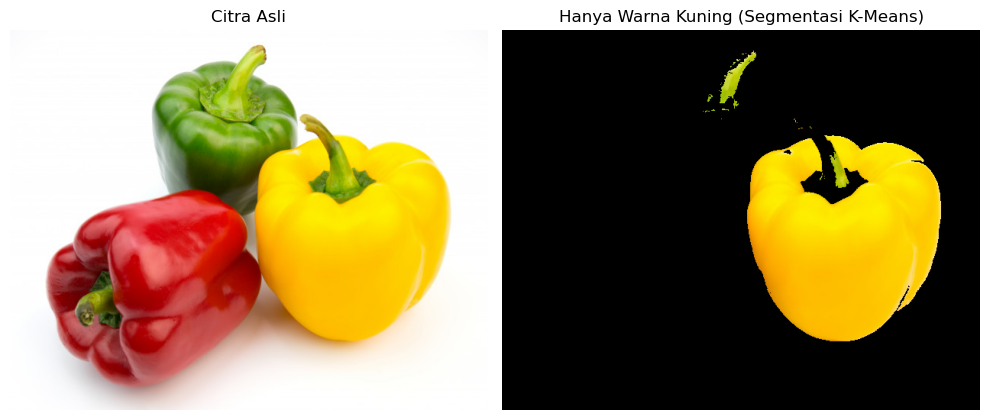

Centroid warna (R,G,B):
[[250 206   4]
 [252 250 248]
 [143  42  18]
 [176 131  82]]
Cluster warna kuning terdeteksi: 0


In [10]:
img_path = r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\peppers.jpg"

# Membaca gambar dan ubah ke RGB
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Ubah ke bentuk data 2D (setiap pixel jadi 1 baris)
Z = img_rgb.reshape((-1, 3))
Z = np.float32(Z)

# ====== K-Means ======
# k = jumlah cluster warna
K = 4
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Ubah center ke uint8 agar bisa divisualisasikan
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img_rgb.shape))

# ====== Menentukan cluster warna kuning ======
# Cari centroid yang paling "kuning" (nilai R & G tinggi, B rendah)
yellow_index = np.argmax(center[:, 0]*0.2 + center[:, 1]*0.8 - center[:, 2]*0.5)

# Buat mask hanya untuk cluster kuning
mask = (label.flatten() == yellow_index)
yellow_only = np.zeros_like(Z)
yellow_only[mask] = Z[mask]
yellow_only = yellow_only.reshape(img_rgb.shape).astype(np.uint8)

# ====== Tampilkan hasil ======
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(yellow_only)
plt.title('Hanya Warna Kuning (Segmentasi K-Means)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Cetak nilai centroid untuk referensi
print("Centroid warna (R,G,B):")
print(center)
print(f"Cluster warna kuning terdeteksi: {yellow_index}")

Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa 
hal itu terjadi.

K-Means membagi warna hanya berdasarkan jarak Euclidean di ruang RGB tanpa memahami “arti warna” sebenarnya.
Pada gambar peppers.jpg, permukaan paprika kuning memiliki gradasi warna kuning terang hingga oranye kehijauan karena pencahayaan.

Akibatnya:

1. Beberapa bagian kuning yang agak gelap bisa masuk ke cluster lain.

2. Bagian hijau pada tangkai bisa “terlihat mirip” secara jarak RGB karena nilai R, G, B-nya mendekati centroid warna kuning.

K-Means Tidak Stabil (Random Initialization)
K-Means memulai dengan centroid acak.
Artinya, hasil tiap kali dijalankan bisa berbeda sedikit, terutama jika nilai K (jumlah cluster) tidak ideal.

Akibatnya:

1. Kadang centroid warna kuning bisa sedikit bergeser.
2. Bisa saja cluster kuning “terbagi dua” atau malah tergabung dengan bagian putih background.

Ruang Warna RGB Kurang Tepat

Ruang warna RGB tidak merepresentasikan persepsi manusia terhadap warna dengan baik.
Misalnya, jarak Euclidean antara kuning dan putih bisa kecil walaupun secara persepsi berbeda jauh.

Akibatnya:

1. Background putih bisa ikut tersegmentasi sedikit.

2. Bagian tepi objek yang terang bisa “dikira kuning muda”.

SOlusi

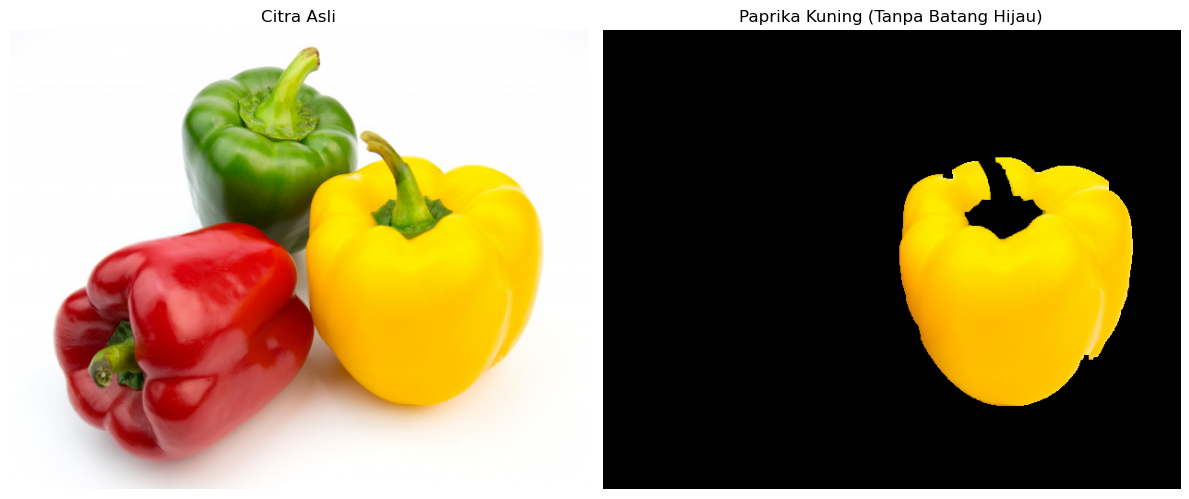

Centroid warna (R,G,B):
[[178  36  32]
 [250 206   3]
 [252 251 249]
 [192 145 110]
 [ 91 116  19]]
Cluster kuning terdeteksi: 1


In [25]:
# === 1. Baca gambar ===
img_path = r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\peppers.jpg"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# === 2. Ubah gambar jadi data 2D untuk clustering ===
Z = img_rgb.reshape((-1, 3))
Z = np.float32(Z)

# === 3. Lakukan K-Means clustering ===
K = 5  # merah, hijau, kuning, background, bayangan
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
_, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# === 4. Ubah center ke uint8 agar bisa divisualisasikan ===
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img_rgb.shape))

# === 5. Deteksi cluster paling kuning ===
R, G, B = center[:, 0], center[:, 1], center[:, 2]
yellow_score = 0.6*G + 0.4*R - 0.8*B
yellow_index = np.argmax(yellow_score)

# === 6. Buat mask untuk cluster kuning ===
mask = (label.flatten() == yellow_index)
mask_img = mask.reshape(img_rgb.shape[:2]).astype(np.uint8) * 255

# === 7. Perbaikan: hapus area hijau dengan filter HSV ===
hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# rentang hijau (untuk dihapus)
lower_green = np.array([30, 50, 50])
upper_green = np.array([85, 255, 255])
green_mask = cv2.inRange(hsv, lower_green, upper_green)

# Hilangkan bagian hijau dari mask kuning
mask_no_green = cv2.bitwise_and(mask_img, cv2.bitwise_not(green_mask))

# === 8. Bersihkan mask (hilangkan noise kecil) ===
kernel = np.ones((5,5), np.uint8)
mask_no_green = cv2.morphologyEx(mask_no_green, cv2.MORPH_OPEN, kernel)
mask_no_green = cv2.morphologyEx(mask_no_green, cv2.MORPH_CLOSE, kernel)

# === 9. Terapkan ke gambar asli ===
yellow_clean = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_no_green)

# === 10. Tampilkan hasil ===
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(yellow_clean)
plt.title("Paprika Kuning (Tanpa Batang Hijau)")
plt.axis("off")

plt.tight_layout()
plt.show()

# === 11. Info tambahan ===
print("Centroid warna (R,G,B):")
print(center)
print(f"Cluster kuning terdeteksi: {yellow_index}")


Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda 
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. 

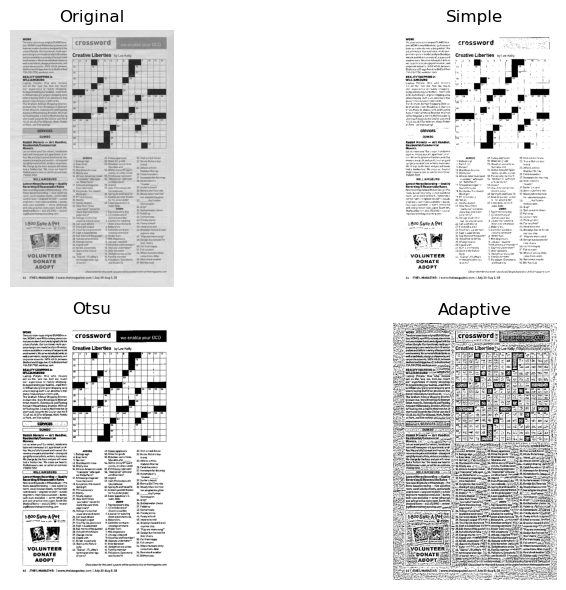

In [ ]:
# Baca gambar
img = cv2.imread(r'D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\crossword.jpg')

# Ubah ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, th_simple = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)


_, th_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

th_adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 11, 2)

# Tampilkan hasil
titles = ['Original', 'Simple', 'Otsu', 'Adaptive']
images = [gray, th_simple, th_otsu, th_adaptive]

plt.figure(figsize=(10,6))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()